In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
from pylab import *
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
headers = ["Id", "RI", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe", "glass-type"]
dataset = pd.read_csv("glassdataset.csv",header=None,names=headers)
print(dataset.shape)
dataset.head(3)

(214, 11)


,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass-type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1


In [3]:
dataset = (dataset.iloc[:,1:12])
dataset.head(3)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass-type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1


/home/calsoft/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/calsoft/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/calsoft/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/home/calsoft/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwa

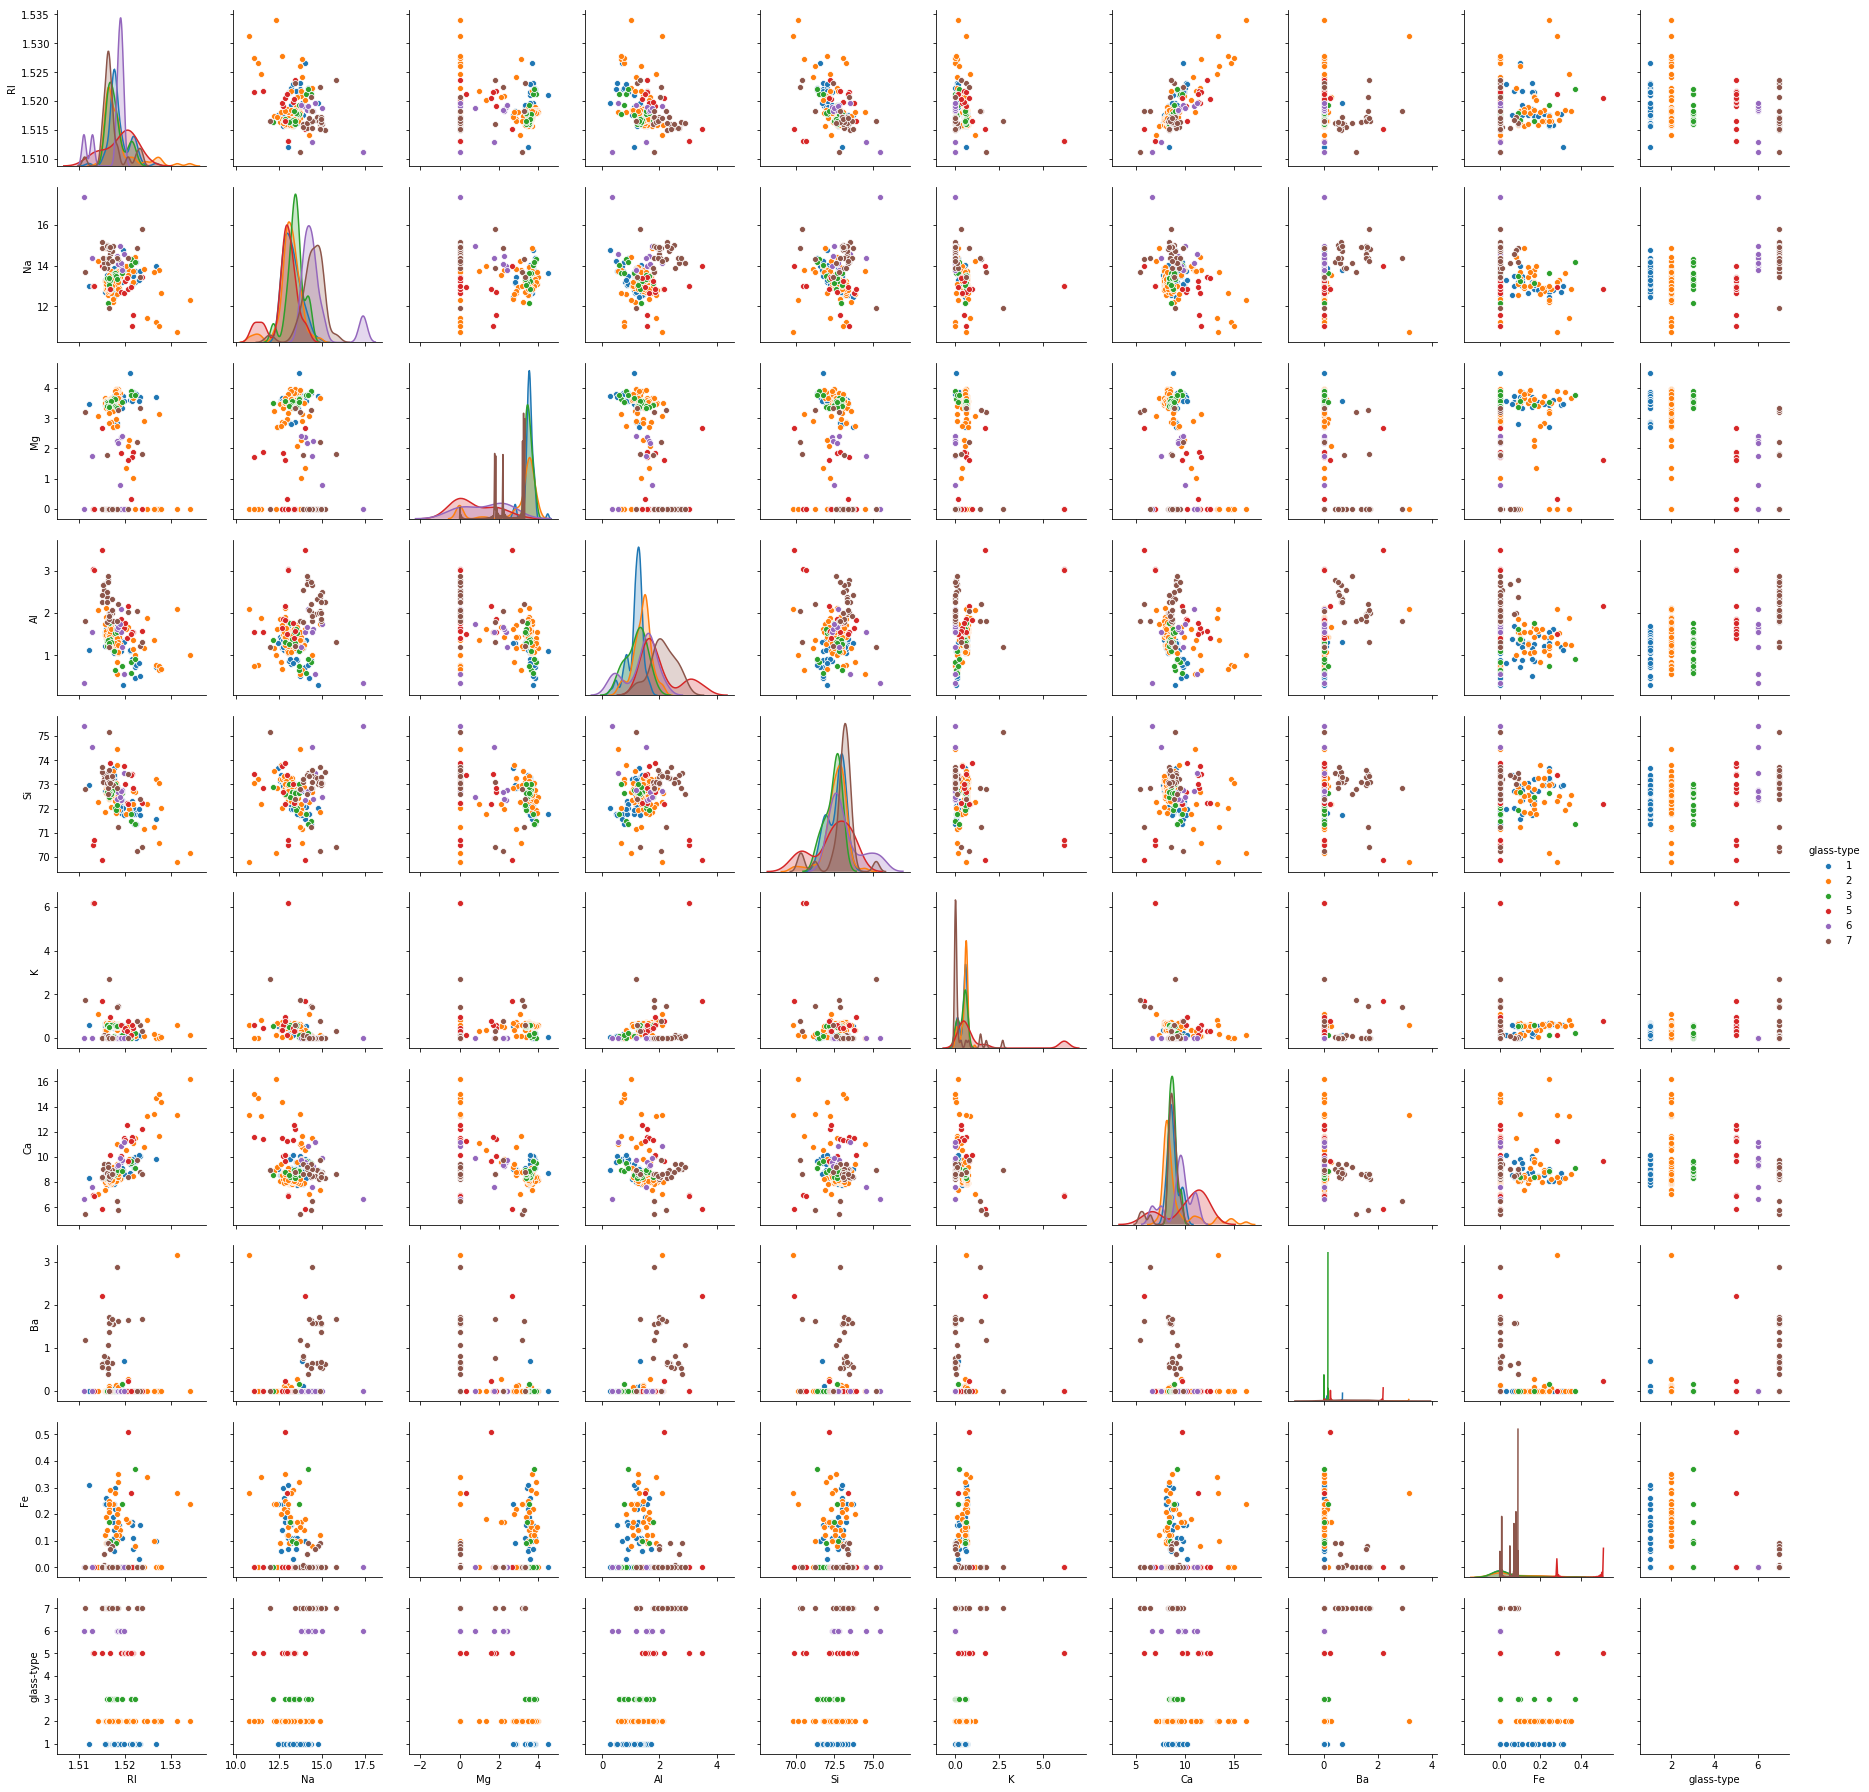

In [4]:
sns.pairplot(dataset, hue = 'glass-type')

In [5]:
dataset['glass-type'].groupby(dataset['glass-type']).count()

glass-type
1    70
2    76
3    17
5    13
6     9
7    29
Name: glass-type, dtype: int64

In [16]:
(dataset.iloc[:,0:9]).describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


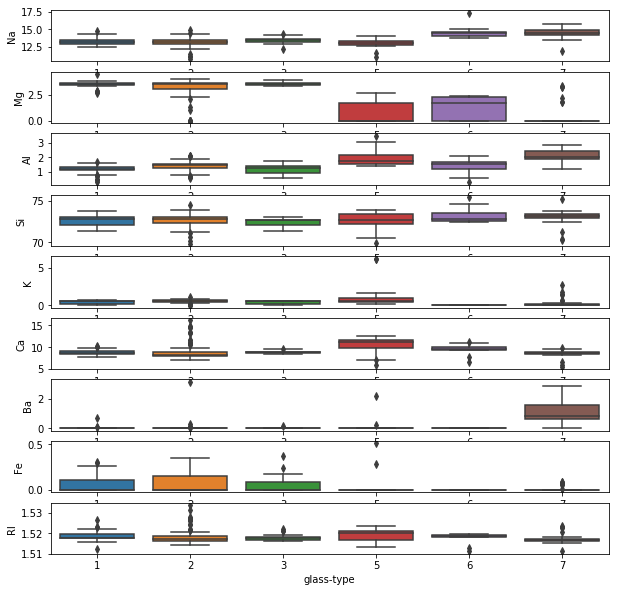

In [7]:
plt.figure(figsize=(10,10))
subplot(9,1,1)
sns.boxplot('glass-type','Na',data =dataset)

subplot(9,1,2)
sns.boxplot('glass-type','Mg',data =dataset)

subplot(9,1,3)
sns.boxplot('glass-type','Al',data =dataset)

subplot(9,1,4)
sns.boxplot('glass-type','Si',data =dataset)

subplot(9,1,5)
sns.boxplot('glass-type','K',data =dataset)

subplot(9,1,6)
sns.boxplot('glass-type','Ca',data =dataset)

subplot(9,1,7)
sns.boxplot('glass-type','Ba',data =dataset)

subplot(9,1,8)
sns.boxplot('glass-type','Fe',data =dataset)

subplot(9,1,9)
sns.boxplot('glass-type','RI',data =dataset)

In [8]:
from sklearn.neighbors import KNeighborsClassifier
x=dataset.iloc[:,0:10].values
y=dataset['glass-type'].values

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
knn.score(x_test,y_test)

1.0

In [9]:
lr = LogisticRegression(multi_class='multinomial',solver='newton-cg')
lr.fit(x_train,y_train)
lr.score(x_test,y_test)

0.9069767441860465

In [10]:
lr = LogisticRegression(C=1000,multi_class='multinomial',solver='lbfgs')
lr.fit(x_train,y_train)
lr.score(x_test,y_test)

/home/calsoft/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9534883720930233

In [11]:
'''#df3=dataset[dataset['glass-type']==3]
#df3=pd.concat([df3]*4)

#df5=dataset[dataset['glass-type']==5]
#df5=pd.concat([df5]*4)

#df6=dataset[dataset['glass-type']==6]
#df6=pd.concat([df6]*6)

df7=dataset[dataset['glass-type']==7]
df7=pd.concat([df7]*2)

df1=dataset[dataset['glass-type']==1]
df2=dataset[dataset['glass-type']==2]

dataset = pd.concat([df1,df2,df3,df5,df6,df7])'''

"#df3=dataset[dataset['glass-type']==3]\n#df3=pd.concat([df3]*4)\n\n#df5=dataset[dataset['glass-type']==5]\n#df5=pd.concat([df5]*4)\n\n#df6=dataset[dataset['glass-type']==6]\n#df6=pd.concat([df6]*6)\n\ndf7=dataset[dataset['glass-type']==7]\ndf7=pd.concat([df7]*2)\n\ndf1=dataset[dataset['glass-type']==1]\ndf2=dataset[dataset['glass-type']==2]\n\ndataset = pd.concat([df1,df2,df3,df5,df6,df7])"

In [12]:
dataset.shape

(214, 10)

In [13]:
from sklearn.neighbors import KNeighborsClassifier
x=dataset.iloc[:,0:10].values
y=dataset['glass-type'].values

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
knn.score(x_test,y_test)

1.0

In [14]:
dataset['glass-type'].groupby(dataset['glass-type']).count()

glass-type
1    70
2    76
3    17
5    13
6     9
7    29
Name: glass-type, dtype: int64